# Keras for Dummies (me)

https://keras.io/#getting-started-30-seconds-to-keras

### 30 Seconds to Keras
 The core data structure of Keras is the model, which is a container of layers. The simplest model object is the Sequential model, a linear stack of layers.
 
 
 You can build any arbitrary graph of layers with the Keras [Functional API](https://keras.io/getting-started/functional-api-guide/).
 

Using TensorFlow backend.


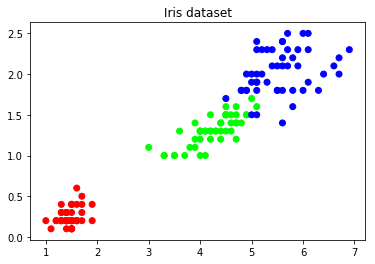

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Activation
from keras.optimizers import RMSprop
import os



iris = load_iris()
X = iris.data
y = np_utils.to_categorical(iris.target)

plt.scatter(X[:,2], X[:,3], c = y)
plt.title("Iris dataset")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y)

 #### Building a Sequentialn model with the .add() method

In [24]:
#instantiate the sequential model 
model = Sequential()

#add layers with the .add() method
model.add(Dense(5, input_shape = [4]))
model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))

#### Configure the models learning with .compile()

In [25]:
""".compile method controls the learning of your model
- set the loss function to show error
- set the optimizer to use when calculating gradient changes
in parameters during backpropagation.
- set the metrics to track during training phase"""

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

#prints a description of our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 25        
_________________________________________________________________
activation_3 (Activation)    (None, 5)                 0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 18        
_________________________________________________________________
activation_4 (Activation)    (None, 3)                 0         
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


### Train the model with .fit() method

In [ ]:
model.fit(X_train, y_train, epochs = 30 , batch_size = 10)

Epoch 1/30
112/112 [==============================] - 0s 2ms/step - loss: 1.1304 - acc: 0.3304
Epoch 2/30
112/112 [==============================] - 0s 348us/step - loss: 1.1144 - acc: 0.3304
Epoch 3/30
112/112 [==============================] - 0s 357us/step - loss: 1.1031 - acc: 0.3661
Epoch 4/30
112/112 [==============================] - 0s 348us/step - loss: 1.0977 - acc: 0.3750
Epoch 5/30
112/112 [==============================] - 0s 348us/step - loss: 1.0932 - acc: 0.4018
Epoch 6/30
 10/112 [=>............................] - ETA: 0s - loss: 1.1325 - acc: 0.2000

### Evaluate performance with .evaluate()

In [5]:
score = model.evaluate(X_test, y_test, batch_size = 10)
print("accuracy: ", score[1])

38/38 [==============================] - 0s 894us/step
accuracy:  0.9473684085042853


### predict with .predict() method

In [23]:
y_pred = model.predict(X)
colors = np.argmax(y_pred, axis = 1)


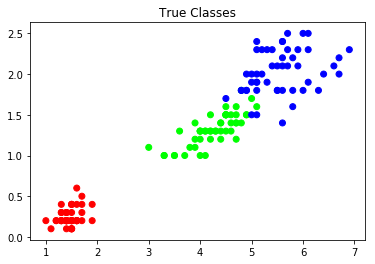

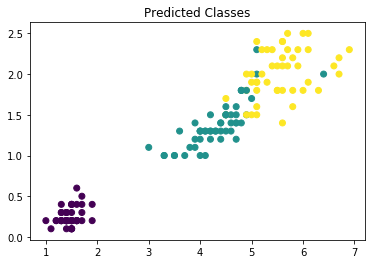

In [22]:
plt.scatter(X[:,2], X[:,3], c = y)
plt.title("True Classes")
plt.show()
plt.scatter(X[:,2], X[:,3], c = colors)
plt.title('Predicted Classes')
plt.show()